In [11]:
import numpy as np
import matplotlib.pyplot as plt

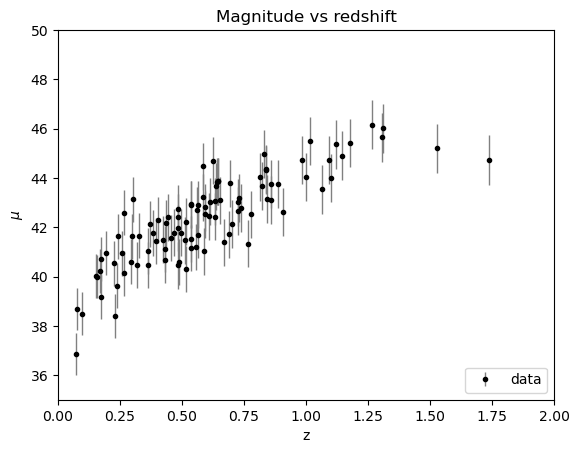

In [12]:
#Plot the data
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel(r'z')
plt.ylabel(r'$\mu$')
plt.legend(loc = 'lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.title(r'Magnitude vs redshift')
plt.show()

In [13]:
#Reshape the data for ML use
z_sample = z_sample[:, np.newaxis]

# 1D linear regression

In [14]:
from astroML.linear_model import LinearRegression

model = LinearRegression()
model.fit(z_sample, mu_sample, dmu)

print(model.coef_)

[39.48384602  4.76438865]


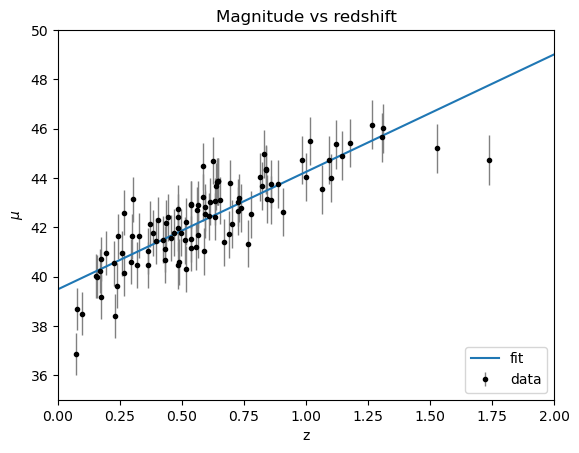

In [15]:
#Fit

theta = model.coef_

#x_grid = np.linspace(np.min(z_sample), np.max(z_sample), 100)
x_grid = np.linspace(0., 2.0, 1000)
y_true = theta[0] + theta[1] * x_grid

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(x_grid, y_true, label='fit')
plt.xlabel(r'z')
plt.ylabel(r'$\mu$')
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.title(r'Magnitude vs redshift')
plt.show()

# Polinomial regression

[39.56505555  4.64711848]
[38.44821027  8.49035585 -2.57760572]
[38.49130243  8.23905057 -2.20391808 -0.15168104]
[ 36.18760445  31.00142053 -69.82397489  82.84185044 -44.24104125
   8.47059008]
[  33.50565858   77.89342065 -337.63347914  765.4161251  -882.60407239
  442.01979981   18.73687926  -98.85713123   25.70456796]


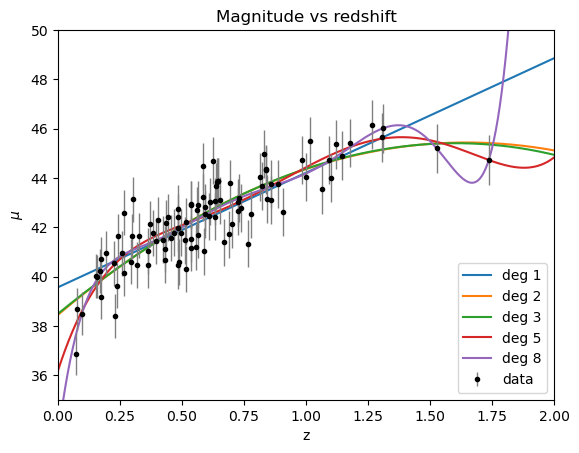

In [16]:
#Visualise different models
from astroML.linear_model import PolynomialRegression

for i in [1, 2, 3, 5, 8]:
    model = PolynomialRegression(i) 
    model.fit(z_sample, mu_sample)

    y_pred = model.predict(x_grid[:, np.newaxis])

    plt.plot(x_grid, y_pred, label=f"deg {i}")

    print(model.coef_)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel(r'z')
plt.ylabel(r'$\mu$')
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.title(r'Magnitude vs redshift')
plt.show()



By eye, N=2 and N=3 seem pretty similar

In [17]:
#Decide the best model with cross-validation
from sklearn.model_selection import GridSearchCV
crange = np.arange(1,10)
model = GridSearchCV(PolynomialRegression(), param_grid={'degree': crange} , cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
model.fit(z_sample, mu_sample)
best = model.best_params_['degree']
print("best parameter choice:", best)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
best parameter choice: 2


[38.44821027  8.49035585 -2.57760572]


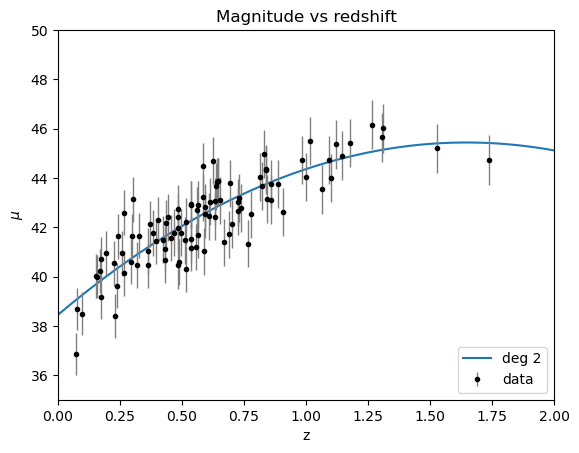

In [ ]:
#Plot the best model
model = PolynomialRegression(best) 
model.fit(z_sample, mu_sample)

y_pred = model.predict(x_grid[:, np.newaxis])

plt.plot(x_grid, y_pred, label=f"deg {best}")

print(model.coef_)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel(r'z')
plt.ylabel(r'$\mu$')
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.title(r'Magnitude vs redshift')
plt.show()